<a href="https://colab.research.google.com/github/nghhuan05/ivp-ktlsp_groupassignment/blob/main/2_1_3_B%C3%A0i_t%E1%BA%ADp_th%E1%BB%B1c_h%C3%A0nh_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']
import graphviz

In [25]:
from google.colab import files
uploaded = files.upload
df = pd.read_csv('train.csv')
df.info()
df.head()

feature_response = df.columns.tolist()
items_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
feature_response = [item for item in feature_response if item not in items_to_remove]

# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df[feature_response], columns=['Sex', 'Embarked'], drop_first=True)

feature_response = df_encoded.columns.tolist()
print(feature_response)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


In [26]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train, X_test, y_train, y_test = \
train_test_split(df_encoded[feature_response[1:]].values, # Use df_encoded and exclude Survived
                 df_encoded['Survived'].values, # Use Survived from df_encoded as target
                 test_size=0.2, random_state=24)

In [27]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

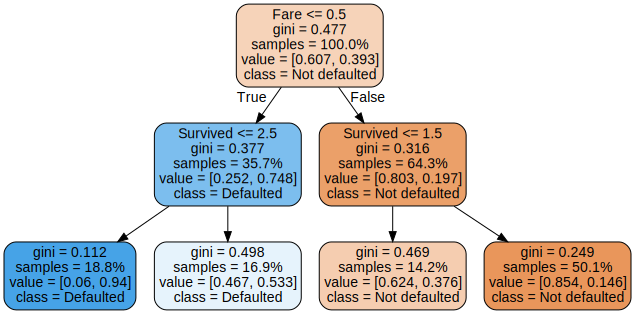

In [30]:
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=\
                                feature_response[:-1],
                                proportion=True,
                                class_names=['Not defaulted', 'Defaulted'])
graph = graphviz.Source(dot_data)
graph

In [32]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters
dt = tree.DecisionTreeClassifier() #tree modal
cv = GridSearchCV(dt, param_grid=params, scoring = 'roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
                  error_score=np.nan,
                  return_train_score=True)
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-829678452.py:7: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE training scores')
/tmp/ipython-input-829678452.py:11: SyntaxWarning: invalid escape sequence '\p'
  label='Mean$\pm$ 1 SE training scores')


Text(0, 0.5, 'ROC AUC')

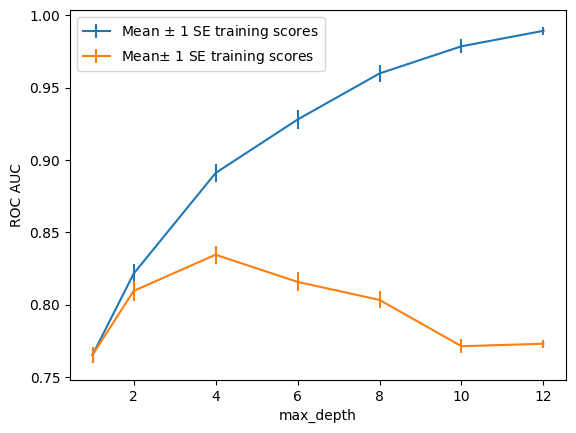

In [37]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df.columns
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean$\pm$ 1 SE training scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [45]:
# Xây dựng Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3,
 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
 max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
 bootstrap=True, oob_score=False, n_jobs=None,
 random_state=4, verbose=0, warm_start=False, class_weight=None)

In [46]:
rf_params_ex = {'n_estimators': list(range(10,110,10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring = 'roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
                  error_score=np.nan,
                        return_train_score=True)
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2220738673.py:12: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE')


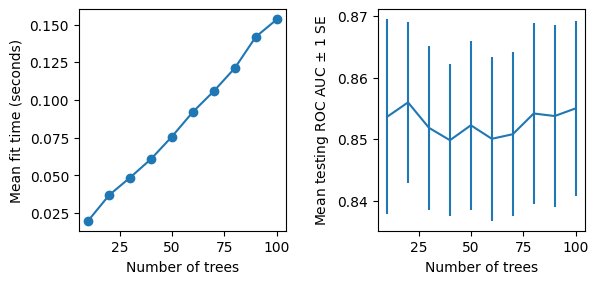

In [48]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE')
plt.tight_layout()

<Axes: >

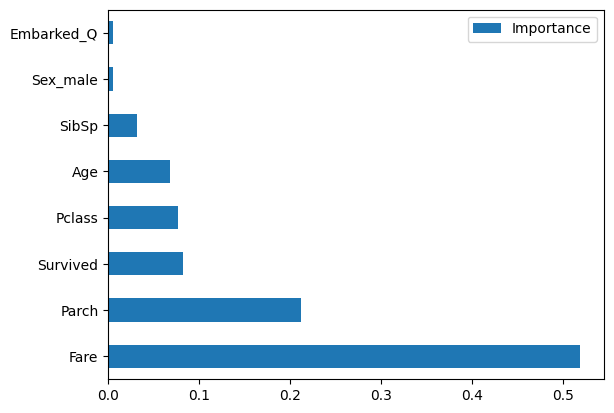

In [49]:
cv_rf_ex.best_params_
# the feature names and importance
feat_imp_df = pd.DataFrame({
    'Importance':cv_rf_ex.best_estimator_.feature_importances_},
                           index=feature_response[:-1])
feat_imp_df.sort_values('Importance', ascending=False).plot.barh()